We want to create frequency stats based on one of the polish text.

Read file odm.txt which servers as a dictionary with all of the declination in polish language.

In [1]:
dictionary = dict()

for line in open('data/odm.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().split(',')]
    base_word = words[0]
    
    for word in words:
        dictionary[word] = base_word

Going through the text, find in the dictionary base_word for given element and add 1 to frequency_stats for this word. Additionally, punctuation is removed.

In [2]:
import string

frequency_stats = dict()

for line in open('data/potop.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().translate(str.maketrans('', '', string.punctuation)).split()]
    for word in words:
        if word in frequency_stats:
            frequency_stats[word] += 1
        else:
            frequency_stats[word] = 1 

In [3]:
# dodawac te, ktorych nie znajdziemy w slowniku

import string

frequency_replaced_stats = dict()

for line in open('data/potop.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().translate(str.maketrans('', '', string.punctuation)).split()]
    for word in words:
        if not word in dictionary:
            continue
        
        replaced_with_base_word = dictionary[word]
        
        if replaced_with_base_word in frequency_replaced_stats:
            frequency_replaced_stats[replaced_with_base_word] += 1
        else:
            frequency_replaced_stats[replaced_with_base_word] = 1

Write frequency_stats to stats.txt

In [4]:
with open('stats.txt', 'w+') as file:
    for word in sorted(frequency_stats, key=frequency_stats.get, reverse=True):
        file.write("{word}: {number_of_times}\n".format(word=word, number_of_times=frequency_stats[word]))

In [5]:
with open('stats_replaced.txt', 'w+') as file:
    for word in sorted(frequency_replaced_stats, key=frequency_replaced_stats.get, reverse=True):
        file.write("{word}: {number_of_times}\n".format(word=word, number_of_times=frequency_replaced_stats[word]))

In [6]:
def mandelbrot_func(x, P, d, B):
    return P / ((x + d)**B)

Create frequency plot

/home/kordian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


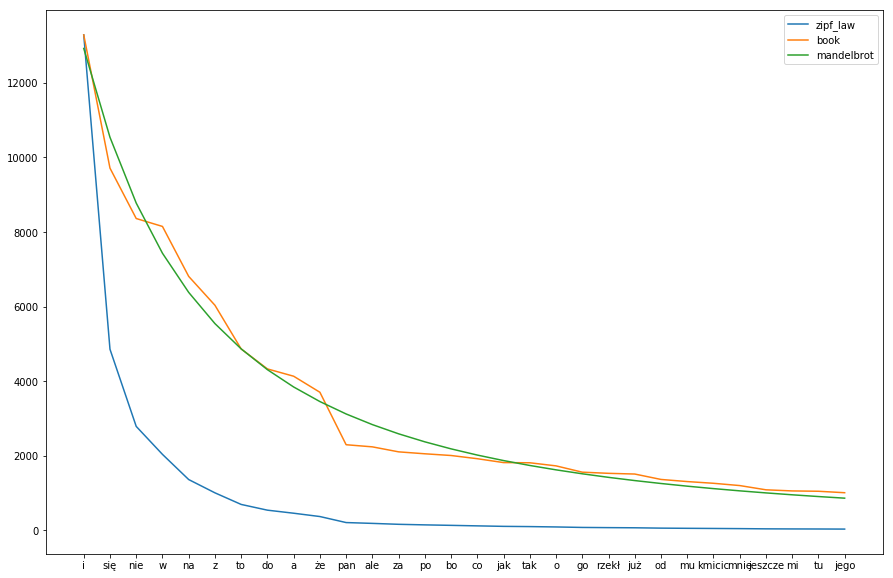

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

limit_words = 30

list_of_sorted_words = sorted(frequency_stats, key=frequency_stats.get, reverse=True)
list_of_frequencies = [frequency_stats[word] for word in list_of_sorted_words]

list_of_limited_sorted_words = sorted(frequency_stats, key=frequency_stats.get, reverse=True)[:limit_words]
list_of_limited_frequencies = [frequency_stats[word] for word in list_of_limited_sorted_words]

zipf_law = []

for index, frequency in enumerate(list_of_limited_frequencies):
    zipf_law.append(frequency/(index+1))


p2, _ = curve_fit(mandelbrot_func, range(1, len(list_of_limited_frequencies) + 1), list_of_limited_frequencies, p0=[4, 4, 4])


plt.plot(list_of_limited_sorted_words, zipf_law)
plt.plot(list_of_limited_sorted_words, list_of_limited_frequencies)
plt.plot(list_of_limited_sorted_words, mandelbrot_func(range(1, len(list_of_limited_frequencies) + 1), *p2))

plt.legend(['zipf_law', 'book', 'mandelbrot'], loc='upper right')

Create frequency plot with words changed according to the loaded dictionary. 

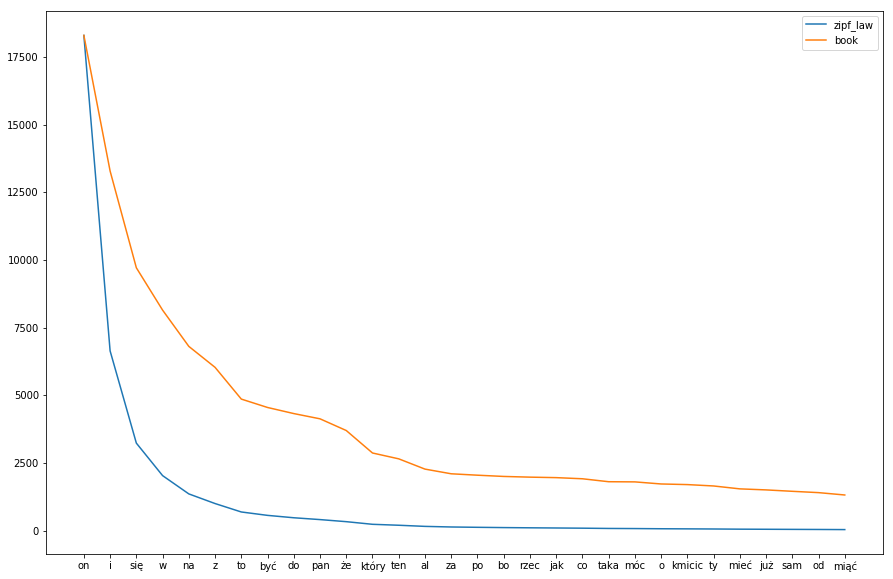

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

limit_words = 30

list_of_replaced_sorted_words = sorted(frequency_replaced_stats, key=frequency_replaced_stats.get, reverse=True)
list_of_replaced_frequencies = [frequency_replaced_stats[word] for word in list_of_replaced_sorted_words]

list_of_limited_replaced_sorted_words = sorted(frequency_replaced_stats, key=frequency_replaced_stats.get, reverse=True)[:limit_words]
list_of_limited_replaced_frequencies = [frequency_replaced_stats[word] for word in list_of_limited_replaced_sorted_words]

zipf_law = []

for index, frequency in enumerate(list_of_limited_replaced_frequencies):
    zipf_law.append(frequency/(index+1))
    
plt.plot(list_of_limited_replaced_sorted_words, zipf_law)
plt.plot(list_of_limited_replaced_sorted_words, list_of_limited_replaced_frequencies)
plt.legend(['zipf_law', 'book'], loc='upper right')

Calculate how many words are 'hapax legomena'. (Frequency is equal 1)

In [9]:
hapax_legomena = list_of_frequencies.count(1)

hapax_legomena

23650

In [10]:
hapax_legomena_replaced = list_of_replaced_frequencies.count(1)

hapax_legomena_replaced

4328

Calculate cumulative frequency, how many words are needed to fulfill 50% of text.

In [ ]:
how_many_words = sum(list_of_frequencies)
half_of_all_words = how_many_words / 2

how_many_words_needed = 0
while sum(list_of_frequencies[:how_many_words_needed]) < half_of_all_words:
    how_many_words_needed += 1
    
how_many_words_needed

In [ ]:
how_many_words = sum(list_of_replaced_frequencies)
half_of_all_words = how_many_words / 2

how_many_words_needed = 0
while sum(list_of_replaced_frequencies[:how_many_words_needed]) < half_of_all_words:
    how_many_words_needed += 1
    
how_many_words_needed

Calculate how many word digrams and trigrams are in text.

In [ ]:
all_text = []

for line in open('data/potop.txt', encoding='utf-8'):
    words = [word.strip().lower() for word in line.strip().translate(str.maketrans('', '', string.punctuation)).split()]
    for word in words:   
        all_text.append(word)

In [ ]:
def create_ngram(n, text):
    n_gram_dict = dict()
    
    for index in range(len(all_text) - 1):
        n_gram_found = all_text[index:index+n]
        n_gram_found = " ".join(n_gram_found)
    
        if n_gram_found in n_gram_dict:
            n_gram_dict[n_gram_found] += 1
        else:
            n_gram_dict[n_gram_found] = 1
    
    return n_gram_dict

In [ ]:
def save_stats_to_file(file_name, n_gram_dict):
    with open('{}'.format(file_name), 'w+') as file:
        for n_gram in sorted(n_gram_dict, key=n_gram_dict.get, reverse=True):
            file.write("{n_gram}: {number_of_times}\n".format(n_gram=n_gram, number_of_times=n_gram_dict[n_gram]))

In [ ]:
digram = 2

digram_dict = create_ngram(digram, all_text)

trigram = 3

trigram_dict = create_ngram(trigram, all_text)

In [ ]:
save_stats_to_file('digram_stats.txt', digram_dict)
save_stats_to_file('trigram_stats.txt', trigram_dict)